In [ ]:
# MACHINE LEARNING WITH SCIKIT-LEARN 

In [ ]:
# importing required packages and modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [32]:
# load the iris data set 
iris = datasets.load_iris()

In [33]:
#  converting faetures - x and  target - y to a pandas dataframe 
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='target')

In [34]:
# map the numeric target values to their actual species names
species_name = dict(enumerate(iris.target_names))
y_named = y.map(species_name)

In [35]:
# understanding the data - first five rows
print("First 5 rows of iris dataset:")
print(pd.concat([x, y_named], axis=1).head())
print("\nData Summary:")
print(pd.concat([x, y_named], axis=1).info())   #from the summary we can see there are no missing values 150 entries and 5 columns
print("\nStatistical Summary:")
print(pd.concat([x, y_named], axis=1).describe())

First 5 rows of iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target     

In [36]:
# encode the target variable - convert species names to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_named)

# show encoded labels
print("\nEncoded target labels:")
for species, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{species}: {code}")


Encoded target labels:
setosa: 0
versicolor: 1
virginica: 2


In [37]:
# splitting the data into training and testing sets. test size is 20% of the total data
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nTraining set size: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")


Training set size: 120, Test samples: 30


In [38]:
# training the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)
print("\nModel training completed.")


Model training completed.


In [39]:
# make predictions on the test set
y_pred = classifier.predict(x_test)

In [40]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)




Model Evaluation Metrics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



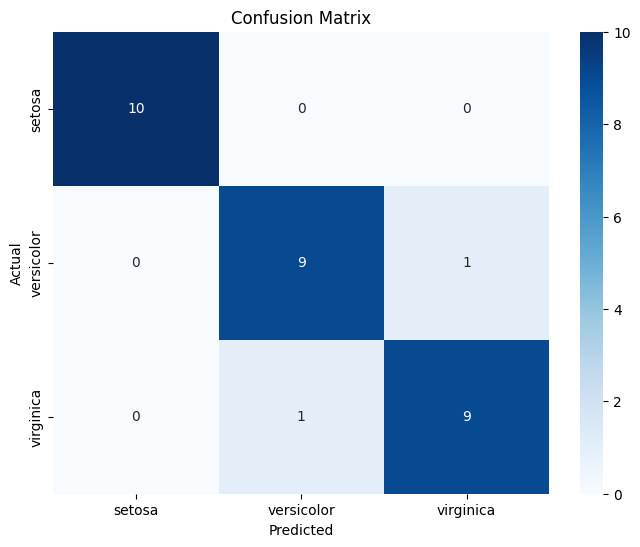

In [41]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

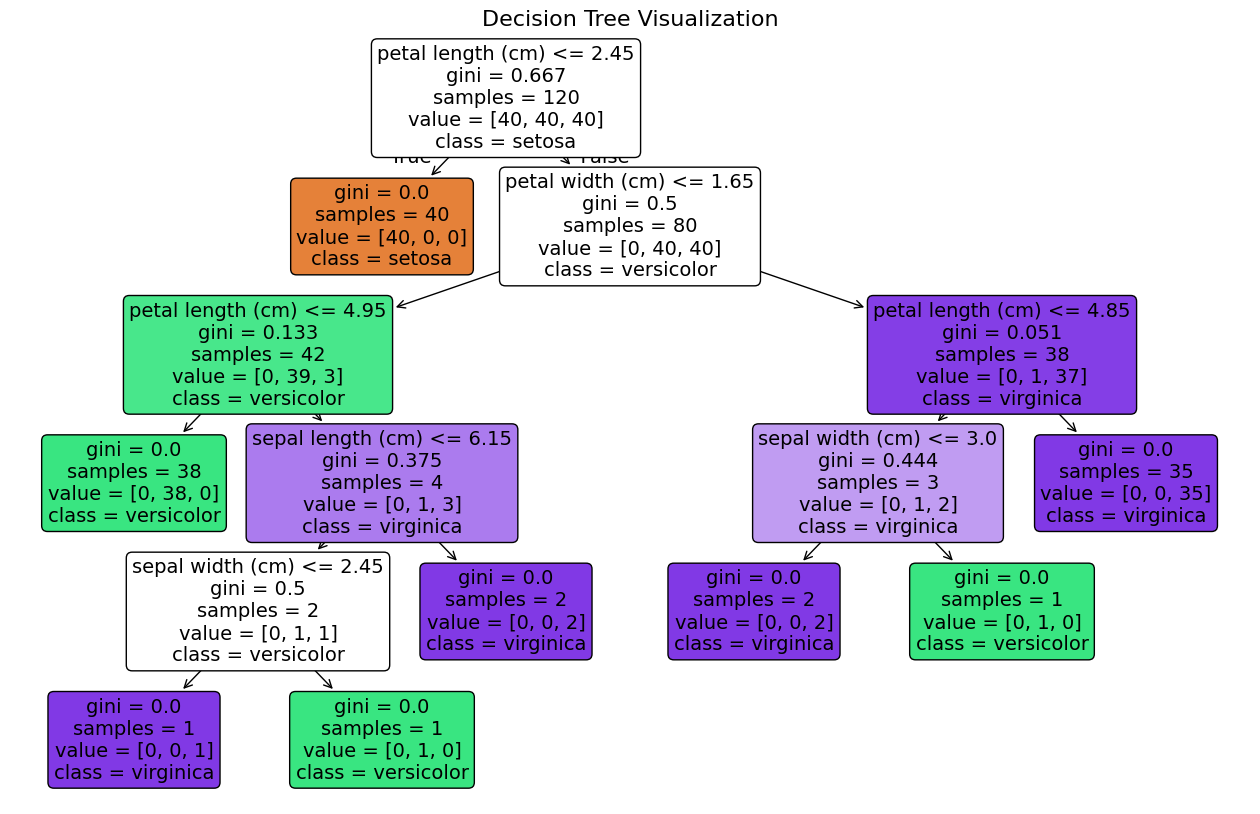

In [42]:
# decision tree visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 10))
plot_tree(classifier, 
        feature_names=iris.feature_names, 
        class_names=iris.target_names, 
        filled=True,
        rounded=True,
        fontsize=14
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [44]:
# DEEP LEARNING WITH PYTORCH 

In [ ]:
# NLP WITH SPACY